<a href="https://colab.research.google.com/github/chiomaswork/Bank-Customer-Segmentation/blob/main/Bank_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of this project is to cluster the customers based on their income and CCAvg

* Income is the annual income
* CCAvg is the average spending on credit card per month

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#Import the files

data = pd.read_csv("/content/drive/MyDrive/Data Science for Marketing Folder/Bank Personal Loan Modelling  - Sheet1.csv")

In [ ]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#Make a copy for scaling
data_scaled = data.copy()

In [ ]:
# create the columns that is to be used for the clustering
cols =[ "Income",  "CCAvg"]

In [ ]:
#Instantiate the standard scaler and scale the income ans ccavg columns
scaler = StandardScaler()
data_scaled[cols] = scaler.fit_transform(data_scaled[cols])

In [ ]:
data_scaled[cols].describe()

,Income,CCAvg
count,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


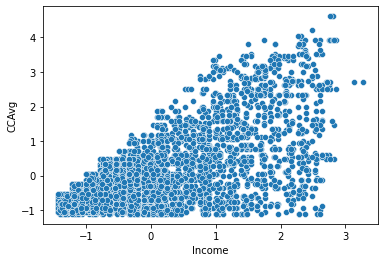

In [ ]:
sns.scatterplot(x="Income", y ="CCAvg", data = data_scaled[cols])

In [ ]:
#Perform the clustering using the Kmeans clustering
model = KMeans(n_clusters = 3, random_state= 42)
model.fit(data_scaled[cols])
data_scaled["Cluster"] = model.predict(data_scaled[cols]) 

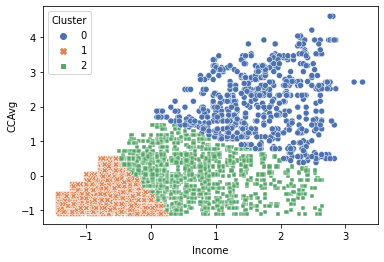

In [ ]:
sns.scatterplot(y ="CCAvg", x= "Income", hue = "Cluster", style = "Cluster", palette="deep", data= data_scaled)

In [ ]:
#Transfer the Clusters to the Original Dataset

data["Cluster"] = data_scaled["Cluster"]

In [ ]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Cluster
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,2
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1


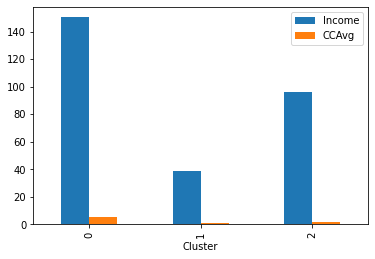

In [ ]:
# Visualize the Cluster with a Barchar

data.groupby("Cluster")[["Income", "CCAvg"]].mean().plot.bar()

In [ ]:
# Use means to know what differentiates the groups
cols_analyze = ['Income', 'CCAvg', 'Age', 'Mortgage', 'Family', 'CreditCard','Online', 'Personal Loan']

data.groupby("Cluster")[cols_analyze].mean()

,Income,CCAvg,Age,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,
0,150.390282,5.540345,43.924765,89.537618,2.017241,0.285266,0.605016,0.413793
1,39.135072,0.982417,45.797197,42.231218,2.513429,0.294667,0.592448,0.000000
2,96.142777,2.025165,45.184049,65.185165,2.363636,0.296152,0.600112,0.120468


* From the above we can see that the major differentiator of the clusters is Income, CCAVG and Morgage

Therefor we can say that:
* Cluster 0 are the customer groups with high income, high credit card use and high morgage

* Cluster 1 are customers with low income low credit card use and low morgage

* Cluster 2 are customers with average income, average credit card use and average morgage.

From the above we can say that credit 2 are the most probable groups to take a loan because their credit rating will probably be ok enought o accomodate an extra loan